# Monday Meeting Analyses

In [2]:
# Geostack

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import rasterio as rio
from rasterio.plot import show
import xdem

## Importing dems, extracting Terrain Roughness Index (TRI)

In [3]:
# Importing to rasterio for mapping.

b_0 = rio.open('/sciclone/home/ntlewis/Nick-Lewis-Research/working_files/data/basins_0.tiff')
b_1 = rio.open('/sciclone/home/ntlewis/Nick-Lewis-Research/working_files/data/basins_1.tiff')

Text(0.5, 1.0, "Massie's Mill TRI")

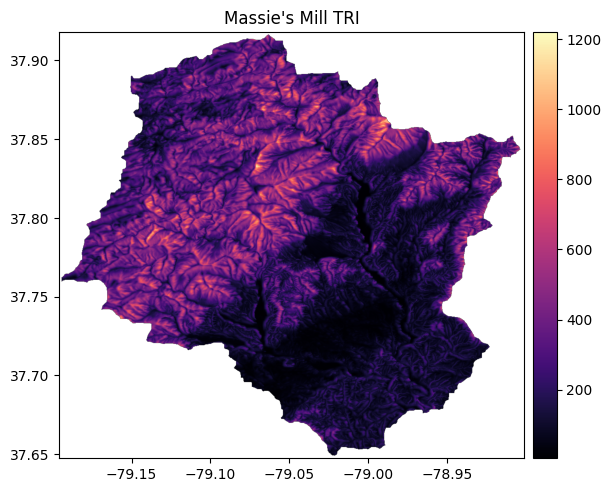

In [4]:
# Importing to xdem for terrain ruggedness index (TRI) calculations.
dem = xdem.DEM('/sciclone/home/ntlewis/Nick-Lewis-Research/working_files/data/basins_0.tiff')

# Gives me elevation difference for each pixel in a 10x10 window (300m x 300m)
tri = dem.terrain_ruggedness_index(window_size=10)

# Mapping.
tri.plot(cmap='magma')
plt.title("Massie's Mill TRI")

In [12]:
# Getting TRI values for each pixel.
tri_data = tri.data

# Ensure tri_data is a numpy array (not masked array)
tri_data = np.asarray(tri_data)

# Mask out no_data/nan values
tri_valid_mask = ~np.isnan(tri_data)
tri_valid_values = tri_data[tri_valid_mask]

# Calculate 25th percentile
percentile_25 = np.percentile(tri_valid_values, 25)

# Boolean mask: True if below 25th percentile and valid, False otherwise (including no_data)
TRI_bool_mask = (tri_data < percentile_25) & tri_valid_mask

# If you want to guarantee dtype is bool and no None values:
TRI_bool_mask = TRI_bool_mask.astype(bool)
TRI_bool_mask  # 2D boolean array

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], shape=(973, 1061))

In [ ]:
# Getting elevation values for each pixel.
dem_data = dem.data

dem_data = np.asarray(dem_data)

# Mask out no_data/nan values
dem_valid_mask = ~np.isnan(dem_data)
dem_valid_values = dem_data[dem_valid_mask]

# Calculate 90th percentile
dem_percentile_90 = np.percentile(dem_valid_values, 90)

# Boolean mask: True if above 90th percentile and valid, False otherwise (including no_data)
dem_bool_mask = (dem_data > dem_percentile_90) & dem_valid_mask
dem_bool_mask = dem_bool_mask.astype(bool)  # Ensure dtype is bool
dem_bool_mask  # 2D boolean array

In [18]:
# Getting elevation values for each pixel.
dem_data = dem.data

# Mask out no_data/nan values
dem_valid_mask = ~np.isnan(dem_data)
dem_valid_values = dem_data[dem_valid_mask]

# Calculate 90th percentile
dem_percentile_90 = np.percentile(dem_valid_values, 90)

# Boolean mask: True if above 90th percentile and valid, False otherwise (including no_data)
dem_bool_mask = np.where(dem_valid_mask & (dem_data > dem_percentile_90), True, False)
dem_bool_mask  # 2D boolean array

NameError: name 'lat' is not defined

In [19]:
nrows, ncols = tri.data.shape
rows, cols = np.indices((nrows, ncols))
xs, ys = tri.transform * (cols, rows)
xs, ys

(array([[-79.19583253, -79.19555475, -79.19527697, ..., -78.90194364,
         -78.90166586, -78.90138808],
        [-79.19583253, -79.19555475, -79.19527697, ..., -78.90194364,
         -78.90166586, -78.90138808],
        [-79.19583253, -79.19555475, -79.19527697, ..., -78.90194364,
         -78.90166586, -78.90138808],
        ...,
        [-79.19583253, -79.19555475, -79.19527697, ..., -78.90194364,
         -78.90166586, -78.90138808],
        [-79.19583253, -79.19555475, -79.19527697, ..., -78.90194364,
         -78.90166586, -78.90138808],
        [-79.19583253, -79.19555475, -79.19527697, ..., -78.90194364,
         -78.90166586, -78.90138808]], shape=(973, 1061)),
 array([[37.91777741, 37.91777741, 37.91777741, ..., 37.91777741,
         37.91777741, 37.91777741],
        [37.91749963, 37.91749963, 37.91749963, ..., 37.91749963,
         37.91749963, 37.91749963],
        [37.91722185, 37.91722185, 37.91722185, ..., 37.91722185,
         37.91722185, 37.91722185],
        ...,

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

# Ensure lat and lon arrays exist (computed from xs, ys and CRS)
# lat, lon should be 2D arrays matching TRI_bool_mask and dem_bool_mask
lat_flat = lat.flatten()
lon_flat = lon.flatten()
tri_mask_flat = TRI_bool_mask.flatten()
dem_mask_flat = dem_bool_mask.flatten()

# Create DataFrame
df = pd.DataFrame({'latitude': lat_flat, 'longitude': lon_flat, 'TRI_mask': tri_mask_flat, 'DEM_mask': dem_mask_flat})

# Create geometry column from lon/lat
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')
gdf.head()

In [11]:
df_test

,0,1
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
1034383,None,False
1034384,None,False
1034385,None,False
1034386,None,False


Text(0.5, 1.0, 'Smoot TRI')

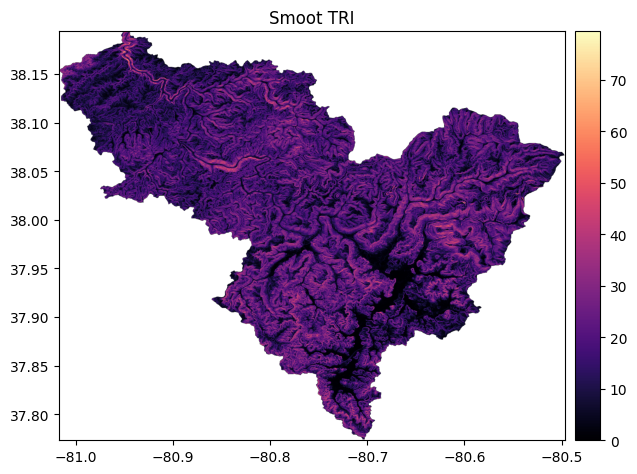

In [22]:
dem = xdem.DEM('/sciclone/home/ntlewis/Nick-Lewis-Research/working_files/data/basins_1.tiff')
tri = dem.terrain_ruggedness_index()
tri.plot(cmap='magma')
plt.title("Smoot TRI")